In [1]:
# initialize the environment
import networkx as nx
import matplotlib.pyplot as plt

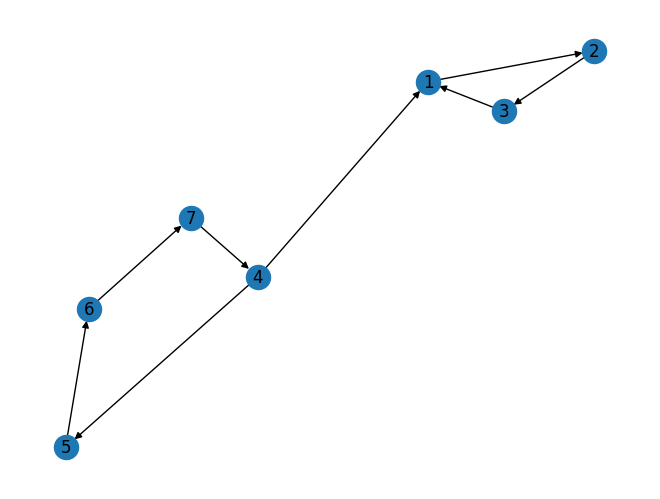

In [2]:
# create a directed graph DG
DG=nx.DiGraph()

# add edges
DG.add_edges_from([
    (1,2),
    (2,3),
    (3,1),
    (4,5),
    (5,6),
    (6,7),
    (7,4),
    (4,1)
])
nx.draw(DG, with_labels=True)

In [3]:
# check the components of the graph
nx.number_strongly_connected_components(DG)

2

In [4]:
# verify is strongly connected
nx.is_strongly_connected(DG)

False

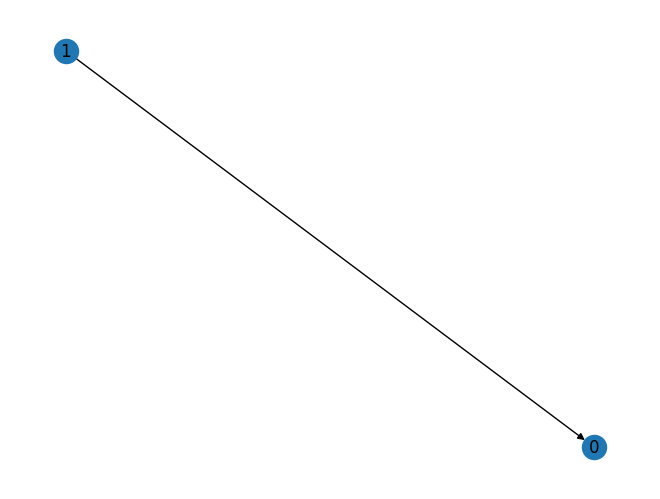

In [5]:
# calculate the condensation graph
CG = nx.condensation(DG)

# draw it
nx.draw(CG, with_labels=True)

In [6]:
# print the members of each component
dict(CG.nodes(data=True))

{0: {'members': {1, 2, 3}}, 1: {'members': {4, 5, 6, 7}}}

In [8]:
# we can also retrieve the mapping for each node
CG.graph['mapping']

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}

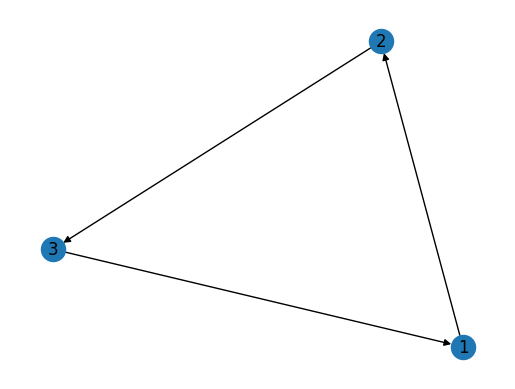

In [9]:
sinks = [DG.subgraph(sink) for sink in nx.attracting_components(DG)]
enum = enumerate
for index,sink in enum(sinks):
    plt.subplot(111+index)
    nx.draw(sink, with_labels=True)

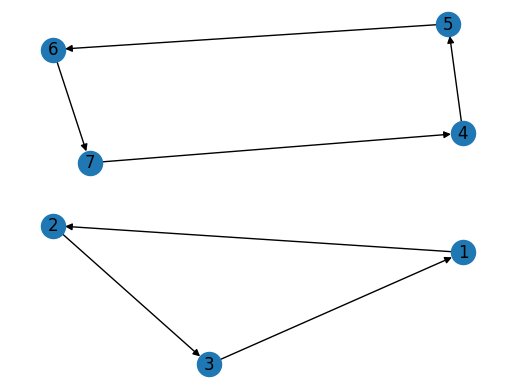

In [10]:
# let's explore the cycles
# simple cycle: a closed path (no node twice)

# let's see how to find them with networkx
cycles = nx.simple_cycles(DG)
for index, c in enum(cycles):
    plt.subplot(211+index)
    nx.draw(DG.subgraph(c), with_labels=True)

### Period of a node
The period of a node is the Greatest Common Divisor of all cycles containing such node.

#### Exercise 1
Try to compute the period of each node in $DG$. 

**Hint**: exploit `networkx.algorithms.cycles.simple_cycles` and `math.gcd()`, which computes the GCD of two given numbers.
Remember that you can compute the GCD of a list of numbers sequentially:

In [130]:
from math import gcd

# calculate the period of graph DG
# perG is the gcd of all the perG(i)
# perG(i) is the min cycle len

CYCLES = list(nx.simple_cycles(DG))

# let's see the result
print(f"cycles are: {cycles}")

def perG(node):    
    try:
        return min(len(c) for c in CYCLES if node in c)
    except:
        return 1

pers = [perG(node) for node in DG.nodes]

# let's see the result:
print(f"periods are: {pers}")

# period of graph is the greater common divisor between them:
x = pers[0]
for per in pers[1:]:
    x = gcd(per, x)
    
# let's see the result:
print(f"the period of the graph: {x}")


cycles are: [[4, 5, 6, 7], [1, 2, 3]]
periods are: [3, 3, 3, 4, 4, 4, 4]
the period of the graph: 1


#### Exercise 2
Consider the following directed graph.

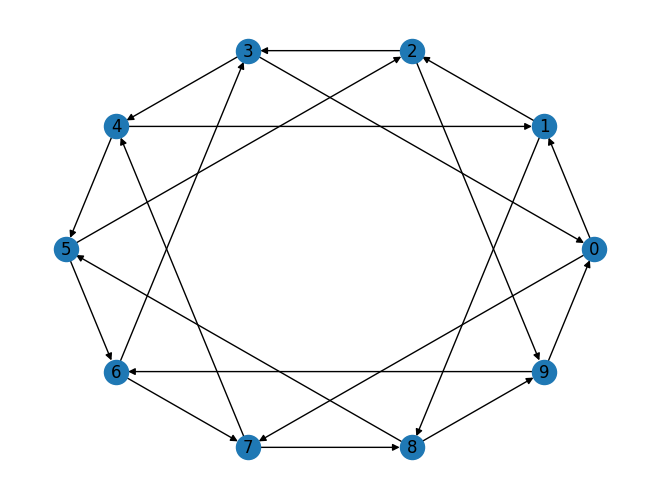

In [134]:
DG = nx.DiGraph()
n_nodes = 10
nx.add_cycle(DG, range(n_nodes))
for n in range(n_nodes):
    other = n+3
    if other>=n_nodes:
        other-=n_nodes
    DG.add_edge(other,n)
nx.draw_circular(DG, with_labels=True)

We can check that DG is strongly connected and not aperiodic

In [136]:
# check if it is aperiodic:
CYCLES = list(nx.simple_cycles(DG))

# let's see the result
print(f"cycles are: {CYCLES}")

def perG(node):    
    try:
        return min(len(c) for c in CYCLES if node in c)
    except:
        return 1

pers = [perG(node) for node in DG.nodes]

# let's see the result:
print(f"periods are: {pers}")

# period of graph is the greater common divisor between them:
x = pers[0]
for per in pers[1:]:
    x = gcd(per, x)
    
# let's see the result:
print(f"the period of the graph: {x}")

cycles are: [[0, 7, 4, 1, 8, 5, 2, 9, 6, 3], [0, 7, 4, 1, 8, 5, 2, 9], [0, 7, 4, 1, 8, 5, 2, 3], [0, 7, 4, 1, 8, 5, 6, 3], [0, 7, 4, 1, 8, 9, 6, 3], [0, 7, 4, 1, 8, 9], [0, 7, 4, 1, 2, 9, 6, 3], [0, 7, 4, 1, 2, 9], [0, 7, 4, 1, 2, 3], [0, 7, 4, 5, 2, 9, 6, 3], [0, 7, 4, 5, 2, 9], [0, 7, 4, 5, 2, 3], [0, 7, 4, 5, 6, 3], [0, 7, 8, 5, 2, 9, 6, 3], [0, 7, 8, 5, 2, 9], [0, 7, 8, 5, 2, 3], [0, 7, 8, 5, 6, 3], [0, 7, 8, 5, 6, 3, 4, 1, 2, 9], [0, 7, 8, 9, 6, 3], [0, 7, 8, 9], [0, 1, 8, 5, 2, 9, 6, 3], [0, 1, 8, 5, 2, 9], [0, 1, 8, 5, 2, 3], [0, 1, 8, 5, 6, 3], [0, 1, 8, 9, 6, 3], [0, 1, 8, 9, 6, 7, 4, 5, 2, 3], [0, 1, 8, 9], [0, 1, 2, 9, 6, 3], [0, 1, 2, 9], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 8, 5, 2, 9, 6, 3, 4], [1, 8, 5, 2, 9, 6, 7, 4], [1, 8, 5, 2, 3, 4], [1, 8, 5, 6, 3, 4], [1, 8, 5, 6, 7, 4], [1, 8, 9, 6, 3, 4], [1, 8, 9, 6, 7, 4], [1, 2, 9, 6, 3, 4], [1, 2, 9, 6, 7, 4], [1, 2, 3, 4], [2, 9, 6, 3, 4, 5], [2, 9, 6, 7, 4, 5], [2, 9, 6, 7, 8, 5], [2, 3, 4, 5], [3, 4, 5, 6], [

In [156]:
# check if it is strongly connected 
# -> It is enough to prove that it has just one comp

len(list(nx.strongly_connected_components(DG)))

# or also:
nx.is_aperiodic(DG)
# and
nx.is_strongly_connected(DG)

True

## Spanning subgraphs
A spanning subgraph is a subgraph that contains all the nodes of the original graph. Of particular interest are spanning trees, i.e., spanning subgraphs that are trees. Spanning trees find many applications, e.g., traveling salesman problem, and search algorithms.

We can generate all the spanning subgraphs of a given graph as follows.

Number of subgraphs: 64


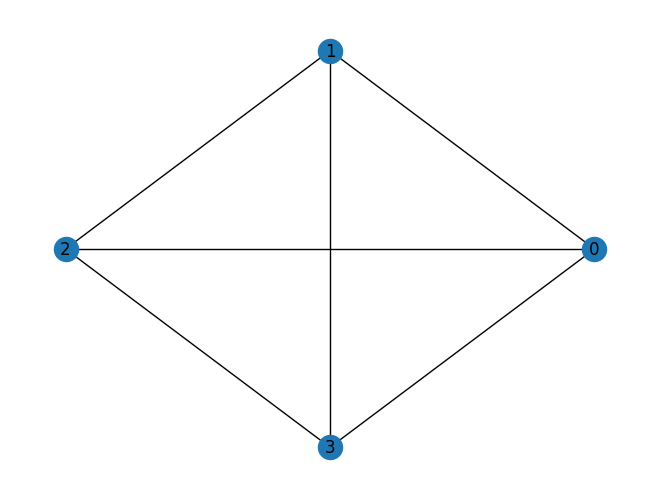

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# build a graph
G = nx.Graph()
nx.add_cycle(G, range(4))
G.add_edges_from([(0,2), (1,3)])

nx.draw_circular(G, with_labels=True)

# compute the power set of a given set as a generator
def powerset(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

# function to calculate the subgraphs of G
def subgraphs(G):
    subgraphs = list()
    for sub in powerset(G.edges):
        H = nx.Graph()
        H.add_nodes_from(G.nodes)
        H.add_edges_from(sub)
        subgraphs.append(H)
    return subgraphs

# print the number of subgraphs
print(f'Number of subgraphs: {len(subgraphs(G))}')

Number of spanning trees: 16


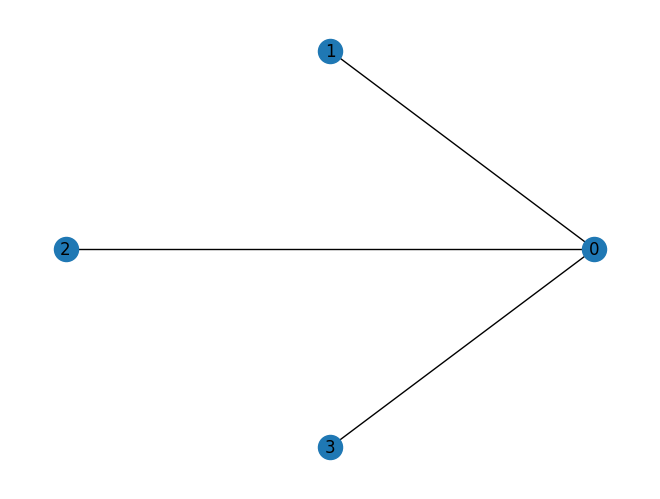

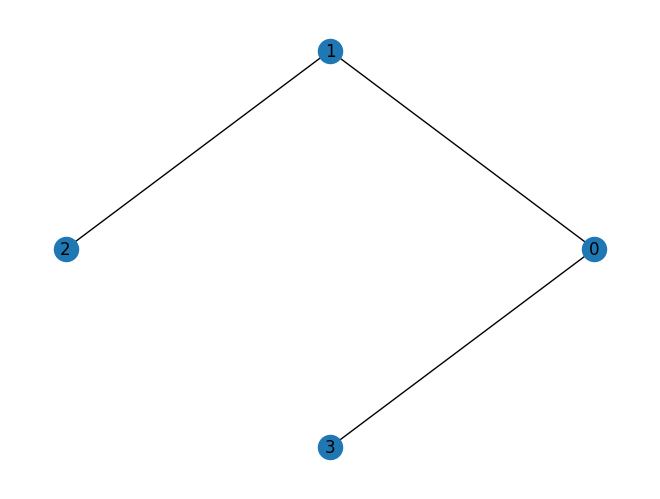

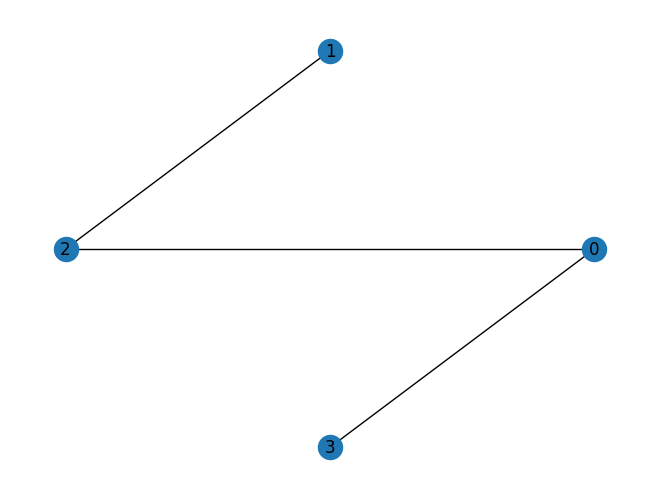

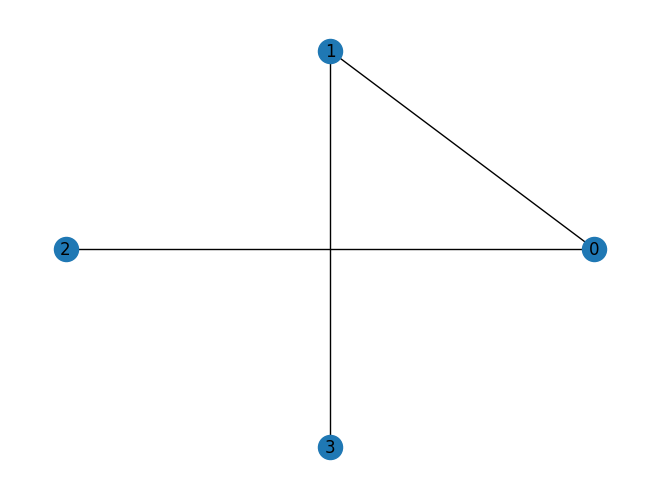

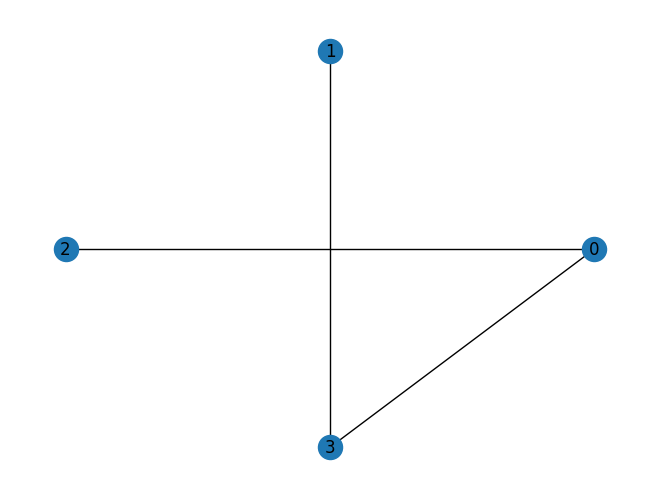

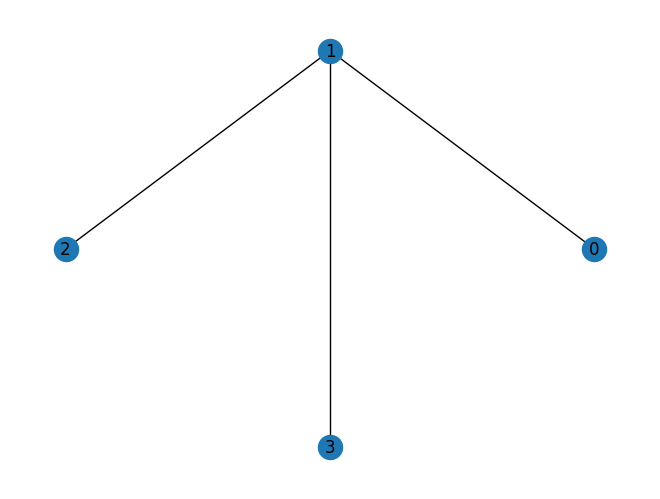

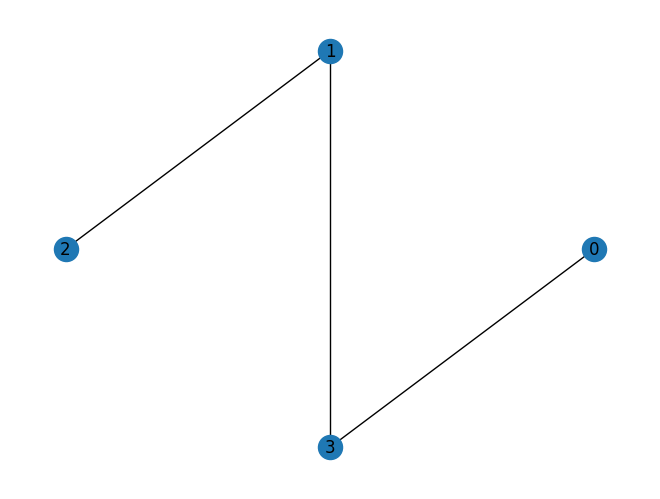

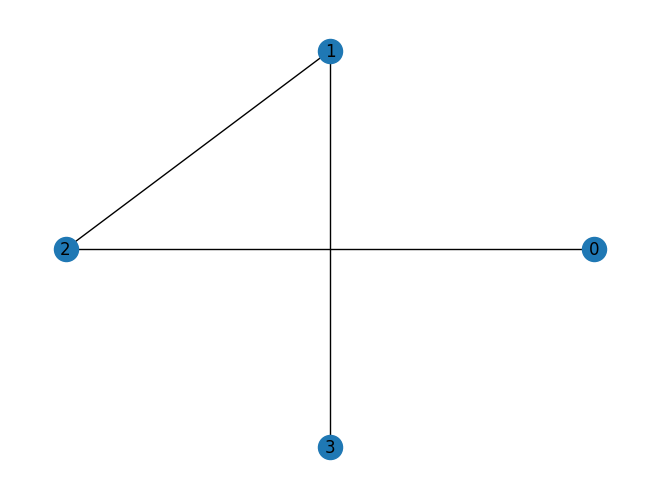

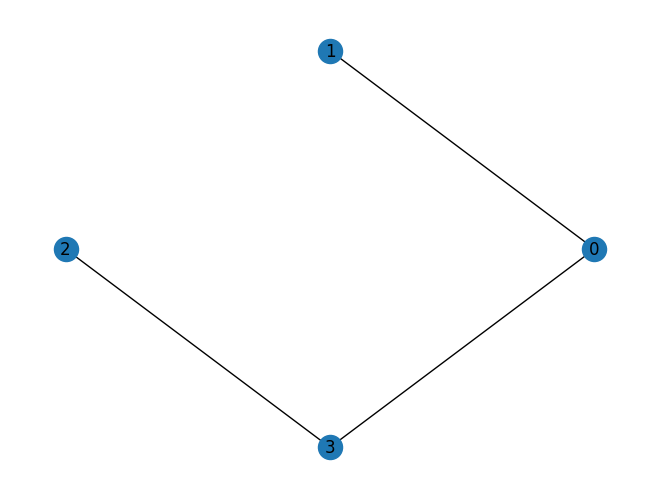

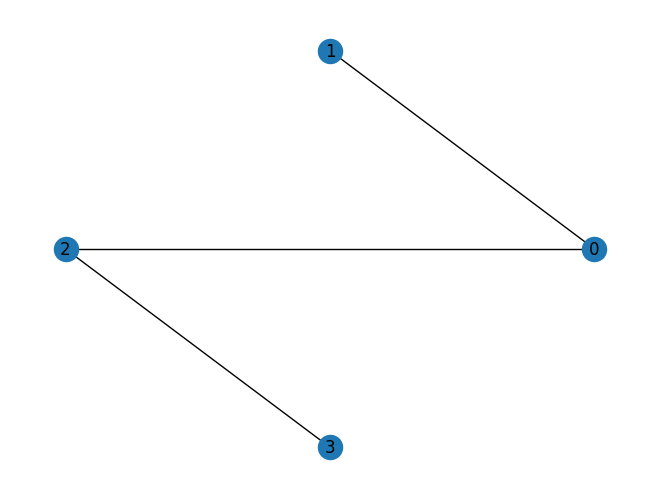

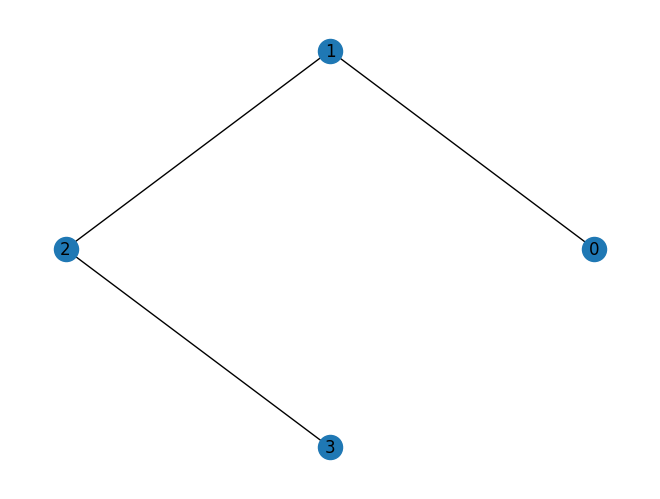

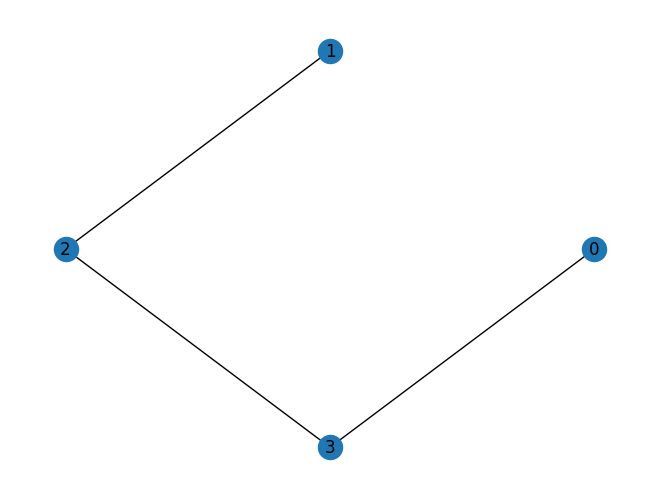

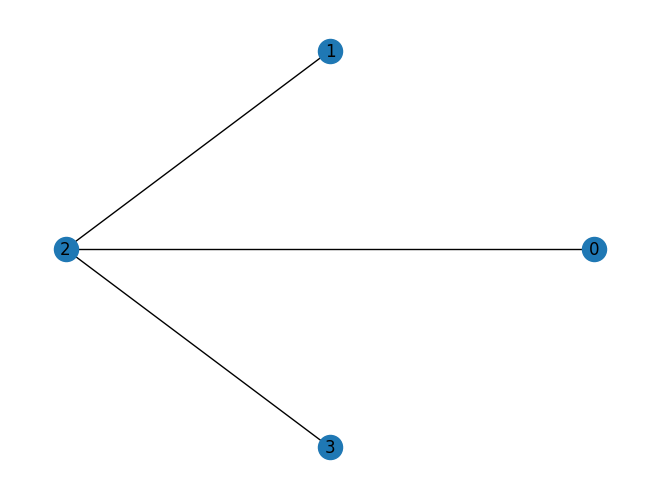

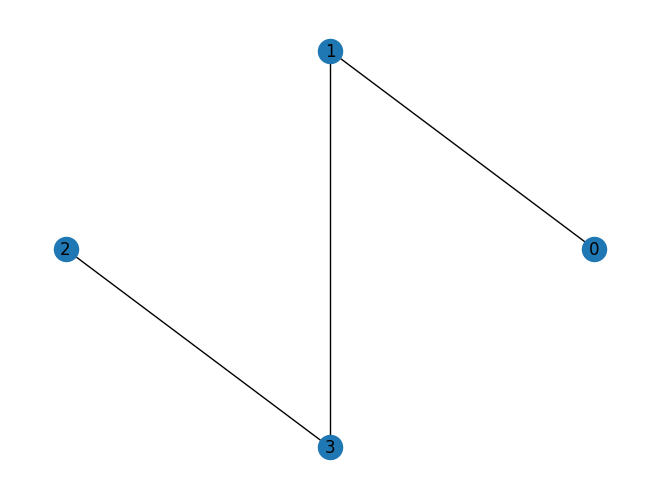

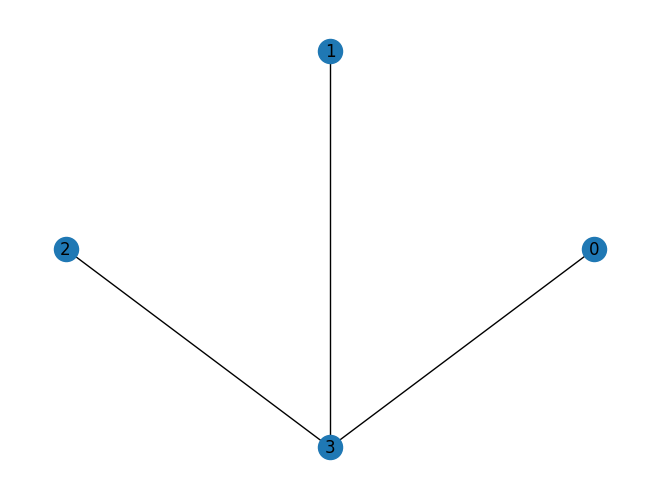

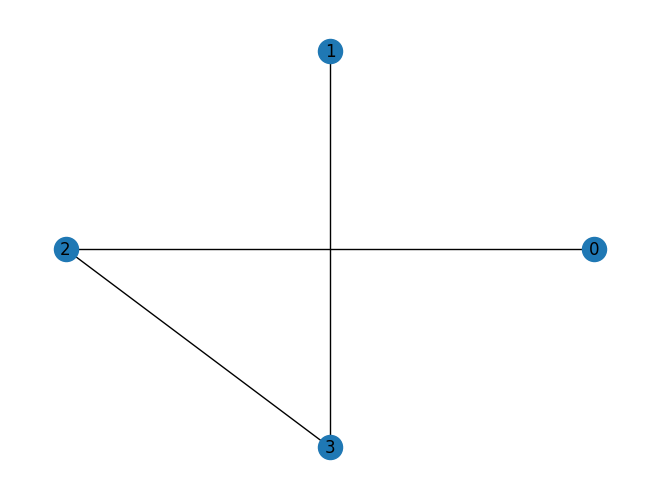

In [64]:
trees = [sub for sub in subgraphs(G) if nx.is_tree(sub)]

print(f'Number of spanning trees: {len(trees)}')
for tree in trees:
    nx.draw_circular(tree, with_labels=True)
    plt.show()